This notebook shows how to:

1. Create a uniform 1‑D spatial grid.  
2. Plot a signal that is the sum of two sinusoids.  
3. Introduce the Fast Fourier Transform (FFT) to compute the signal's frequency spectrum.  
4. Plot the FFT magnitude.

**Author:** Rachel Migdal – 16 September 2025

1) Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

2) Build a 1‑D Spatial Grid (as demonstrated in previous notebook)

* `dx_m` – grid spacing (meters)  
* `L_m`  – total screen length (meters)  
* `x_m`  – coordinate array spanning `[-L_m/2, L_m/2]`

In [2]:
dx_m = 1e-3               # grid spacing, m
L_m  = 1.0                # screen size, m
x_m = np.linspace(-L_m/2, L_m/2, int(L_m/dx_m) + 1)

print(f"Number of grid points: {x_m.size}")

Number of grid points: 1001


3) Generate the Two‑Tone Signal  

The signal is  

$s(x) = \sin(2\pi f_1 x) + \tfrac12\sin(2\pi f_2 x)$  

with `f₁ = 20 cycles m⁻¹` and `f₂ = 5 cycles m⁻¹`.

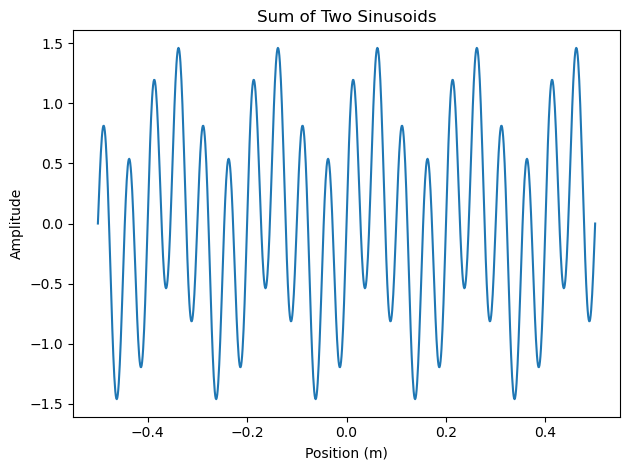

In [6]:
f1_pm = 20.0                 # spatial frequency 1 (cycles/m)
f2_pm = 5.0                  # spatial frequency 2 (cycles/m)

# The screen is "1 meter" wide

signal = np.sin(2*np.pi*f1_pm*x_m) + 0.5*np.sin(2*np.pi*f2_pm*x_m)

plt.plot(x_m, signal, color='tab:blue')
plt.xlabel('Position (m)')
plt.ylabel('Amplitude')
plt.title('Sum of Two Sinusoids')
plt.tight_layout()
plt.show()

4) Introduce the Fast Fourier Transform (FFT) and Plot the Spectrum

`S = np.fft.fftshift(np.fft.fft(s))`
* `np.fft.fft(s)` computes the Discrete Fourier Transform (DFT) of s.
* This converts the signal from the spatial domain (position) to the frequency domain (spatial frequency).
* `np.fft.fftshift(...)` rearranges the FFT output so that zero frequency is in the center of the array, with negative frequencies on the left and positive frequencies on the right.

Frequency bins:
`freq_pm = np.fft.fftshift(np.fft.fftfreq(np.int32(Dx_m/dx_m)+1, dx_m))`
* `np.fft.fftfreq(N, d)` returns the frequency bins for an FFT:
* `N` = number of samples (1001 here).
* `d` = sample spacing in meters (dx_m).
* This gives frequencies in cycles per meter.
* `fftshift` rearranges the bins so that zero frequency is centered.

``

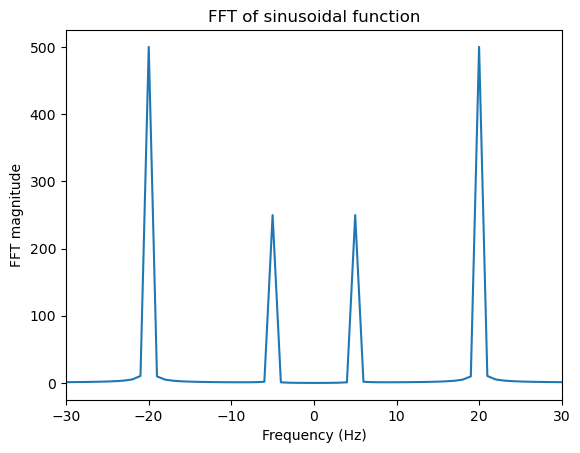

In [9]:
s = signal # rename for brevity
S = np.fft.fftshift(np.fft.fft(s))

plt.show()

freq_pm = np.fft.fftshift(np.fft.fftfreq(np.int32(L_m/dx_m)+1, dx_m))


plt.plot(freq_pm, np.abs(S))
plt.xlabel("Frequency (Hz)")
plt.ylabel("FFT magnitude")
plt.title("FFT of sinusoidal function")
plt.xlim(-30, 30)

plt.show()
